TÓPICOS EM INTELIGÊNCIA COMPUTACIONAL - PROGRAMA DE PÓS-GRADUAÇÃO EM MODELAGEM COMPUTACIONAL DE SISTEMAS - 2021-2

<img src="imagens/ppgmcs.png" alt="tic">

---
# Univerisdade Federal do Tocantins - UFT
## Programa de Pós-graduação em Modelagem Computacional de Sistemas - PPGMCS

---
# Tópicos em Inteligência Computacional 2021-2
### Professor: Marcelo Lisboa. <mlisboa@uft.edu.br>
---

#Oficial
https://pycaret.org/create-model/

#Github
https://github.com/pycaret/pycaret/tree/master/examples

#Índice

1. O que é PyCaret e por que você deve usá-lo?

2. Como criar nosso modelo de aprendizado de máquina usando 
PyCaret 

3. Construindo modelos de conjunto usando PyCaret

4. Vamos analisar nosso modelo!

5. É hora de fazer novas previsões

6. Salvar e carregar o modelo


**Por que vc deve usá-lo**

- Torna você mais produtivo.
- Você pode gastar menos tempo codificando e pode fazer mais experimentos
- É uma biblioteca de aprendizado de máquina fácil de usar que o ajudará a realizar experimentos completos na construção de Máquinas Preditivas, aprendizado de máquina, seja atribuindo valores ausentes, codificando dados categóricos, engenharia de recursos, ajuste de hiperparâmetros ou criando modelos de conjunto (quer mais? rsrsrs).

##Problema de Negócio

Temos um conjunto de dados bancários com características como idade do cliente, experiência, renda, escolaridade e se ele possui cartão de crédito ou não.

O banco quer construir uma máquina preditiva com aprendizado de máquina que os ajudará a identificar os **clientes em potencial com maior probabilidade de adquirir um empréstimo pessoal.**

**Instalando PyCaret em sua máquina**

In [1]:
!pip3 install pycaret

**Instalando a Biblioteca de Interpretabilidade do Modelo**

In [2]:
!pip install shap

  Attempting uninstall: packaging
    Found existing installation: packaging 20.7
    Uninstalling packaging-20.7:
      Successfully uninstalled packaging-20.7


# Problema sobre análise se uma pessoa vai ser dada empréstimo (loan) baseado em dados

Columns of data file:
ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard

In [3]:
# importing pandas to read the CSV fil
import pandas as pd
# read the data : can read form internet or local disk
data_classification = pd.read_csv('https://raw.githubusercontent.com/lakshay-arora/PyCaret-Example/master/datasets/loan_train_data.csv')
# view the top rows of the data
data_classification.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,3510,38,12,61,91330,3,0.9,3,0,0,0,0,0,0
1,1129,30,5,171,94025,2,1.9,2,0,1,0,0,0,0
2,1637,65,39,100,92122,4,1.7,3,0,0,0,0,0,1
3,3165,28,4,82,95136,4,0.0,1,0,0,0,0,1,1
4,3563,32,8,169,94596,1,6.5,3,272,1,1,1,1,0


In [4]:
data_classification.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,3510,38,12,61,91330,3,0.9,3,0,0,0,0,0,0
1,1129,30,5,171,94025,2,1.9,2,0,1,0,0,0,0
2,1637,65,39,100,92122,4,1.7,3,0,0,0,0,0,1
3,3165,28,4,82,95136,4,0.0,1,0,0,0,0,1,1
4,3563,32,8,169,94596,1,6.5,3,272,1,1,1,1,0


In [5]:
# Verificando a Versão do Pycaret
from pycaret.utils import version
version()

'2.3.1'

**Importando um Módulo:**

 Dependendo do tipo de problema que você vai resolver, primeiro você precisa importar o módulo. Na primeira versão do PyCaret, 6 módulos diferentes estão disponíveis - regressão, classificação, clustering, processamento de linguagem natural (PNL), detecção de anomalias e regra de mineração associada. Neste artigo, vamos resolver um problema de classificação e, portanto, vamos importar o módulo de classificação

**Inicializando a configuração :**

 O PyCaret executa algumas tarefas básicas de pré-processamento, como ignorar os IDs e as colunas de data, imputar os valores ausentes, codificar as variáveis ​​categóricas e dividir o conjunto de dados na divisão de teste e treino para o restante das etapas de modelagem . Quando você executa a função de configuração, ela primeiro confirma os tipos de dados e, em seguida, se você pressionar enter, criará o ambiente para você prosseguir

# Como o problema é se dará empréstimo (loan) ou não para uma pessoa, esse problema é de classificação

In [6]:
from pycaret import classification

# Dê um enter no campo em branco que abre abaixo

In [7]:
classification_setup = classification.setup(data= data_classification, target='Personal Loan')

,Description,Value
0,session_id,8538
1,Target,Personal Loan
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(4000, 14)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


**Treinando um modelo**  

Treinar um modelo no PyCaret é bastante simples. Você só precisa usar a função **create_model** que leva apenas um parâmetro - a abreviação do modelo como uma string. 

Aqui, vamos primeiro treinar um modelo de árvore de decisão para o qual temos que passar **“ dt ”** e ele retornará uma tabela com pontuações de **validação cruzada k-fold** de métricas de avaliação comuns usadas para modelos de classificação.

Aqui está um lembrete rápido das **métricas de avaliação** usadas para aprendizagem supervisionada:

**Classificação**: precisão, AUC, recall, precisão, F1, Kappa
**Regressão**:  MAE, MSE, RMSE, R2, RMSLE, MAPE

**Usa K-fold com K=10**

In [8]:
# Criando o Modelo (Máquina Preditiva) dt para "decision tree"
classification_dt = classification.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9786,0.9716,0.9630,0.8387,0.8966,0.8847,0.8873
1,0.9750,0.9226,0.8571,0.8889,0.8727,0.8589,0.8590
2,0.9714,0.9206,0.8571,0.8571,0.8571,0.8413,0.8413
3,0.9857,0.9603,0.9286,0.9286,0.9286,0.9206,0.9206
4,0.9857,0.9762,0.9643,0.9000,0.9310,0.9231,0.9238
5,0.9893,0.9623,0.9286,0.9630,0.9455,0.9395,0.9397
6,0.9714,0.9524,0.9286,0.8125,0.8667,0.8507,0.8531
7,0.9857,0.9762,0.9643,0.9000,0.9310,0.9231,0.9238
8,0.9821,0.9266,0.8571,0.9600,0.9057,0.8958,0.8976
9,0.9785,0.9220,0.8519,0.9200,0.8846,0.8728,0.8736


In [10]:
# Criando Agrupamentos Boosting 
boosting = classification.ensemble_model(classification_dt, method= 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9857,0.9756,0.9630,0.8966,0.9286,0.9206,0.9214
1,0.9750,0.9226,0.8571,0.8889,0.8727,0.8589,0.8590
2,0.9750,0.9226,0.8571,0.8889,0.8727,0.8589,0.8590
3,0.9821,0.9425,0.8929,0.9259,0.9091,0.8992,0.8994
4,0.9893,0.9782,0.9643,0.9310,0.9474,0.9414,0.9416
5,0.9893,0.9623,0.9286,0.9630,0.9455,0.9395,0.9397
6,0.9786,0.9563,0.9286,0.8667,0.8966,0.8846,0.8853
7,0.9857,0.9762,0.9643,0.9000,0.9310,0.9231,0.9238
8,0.9857,0.9286,0.8571,1.0000,0.9231,0.9153,0.9186
9,0.9857,0.9259,0.8519,1.0000,0.9200,0.9122,0.9157


In [11]:
# Comparando diversas Máquinas Preditivas
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9868,0.9979,0.8992,0.9667,0.9309,0.9236,0.9248,0.2670
xgboost,Extreme Gradient Boosting,0.9868,0.9951,0.9028,0.9641,0.9306,0.9233,0.9250,0.4760
rf,Random Forest Classifier,0.9861,0.9965,0.8709,0.9884,0.9236,0.9161,0.9196,0.2690
lightgbm,Light Gradient Boosting Machine,0.9854,0.9963,0.8776,0.9739,0.9212,0.9132,0.9159,0.2660
et,Extra Trees Classifier,0.9825,0.9910,0.8272,0.9963,0.9023,0.8928,0.8984,0.2010
dt,Decision Tree Classifier,0.9803,0.9491,0.9101,0.8969,0.9019,0.8910,0.8920,0.0130
ada,Ada Boost Classifier,0.9650,0.9769,0.7587,0.8769,0.8091,0.7901,0.7951,0.1310
lda,Linear Discriminant Analysis,0.9428,0.9595,0.6146,0.7646,0.6802,0.6493,0.6546,0.0240
ridge,Ridge Classifier,0.9353,0.0000,0.3771,0.9328,0.5339,0.5061,0.5678,0.0160
lr,Logistic Regression,0.9118,0.9255,0.3659,0.5710,0.4432,0.3989,0.4114,0.0440


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8538, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**Observar:** na última linha acima mostra os parâmetros da melhor técnica utilizada

**desenha a curva AUC da Decision Tree**

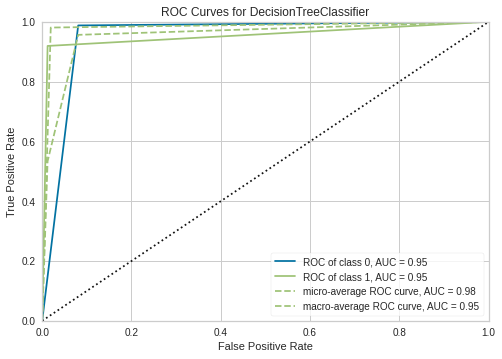

In [12]:
# Gráfico AUC-ROC 
classification.plot_model(classification_dt, plot = 'auc')

**desenha o gráfico da precision da Decision Tree**

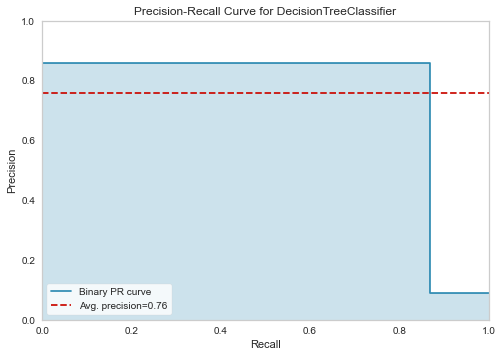

In [12]:
# Curva Precision Recall
classification.plot_model(classification_dt, plot = 'pr')

**desenha o gráfico da validation curve para Decision Tree**

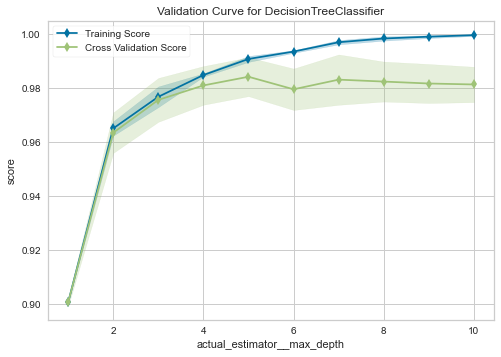

In [13]:
# Validation Curve
classification.plot_model(classification_dt, plot = 'vc')

**verifica as importâncias das variáveis**

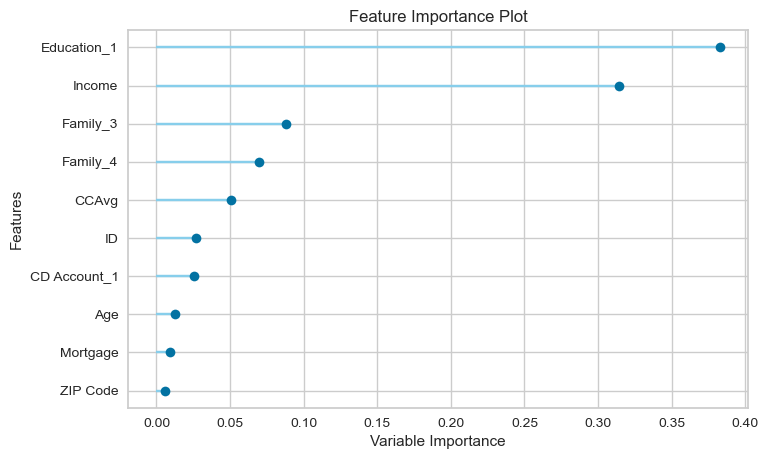

In [15]:
# Importância das Variáveis
classification.plot_model(classification_dt, plot = 'feature')

**mostra a matriz de confusão da Decision Tree**

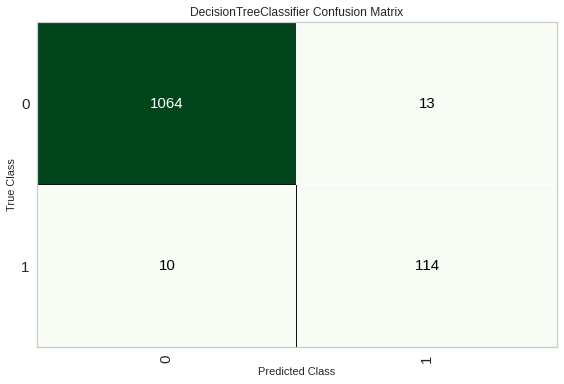

In [16]:
# Confusion Matrix
classification.plot_model(classification_dt, plot = 'confusion_matrix')

**Clicar nas opções abaixo para mostrar as diversas avaliações da técnica utilizada**

In [16]:
# Avaliação das Máquinas Preditivas
classification.evaluate_model(classification_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Interpretabilidade dos Modelos (das Máquinas Preditivas)

**mostra a importância de cada uma das variáveis em ordem decrescente**

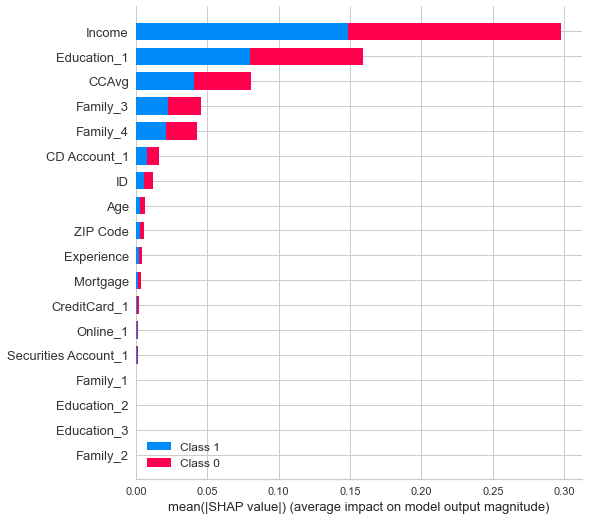

In [18]:
# Usando a Biblioteca SHAP
classification.interpret_model(classification_dt)

**passando novos dados de teste**

In [19]:
# Dados de Teste
test_data_classification = pd.read_csv('https://raw.githubusercontent.com/lakshay-arora/PyCaret-Example/master/datasets/loan_test_data.csv')

**fazendo novas predições/estimações**

In [20]:
# Fazendo novas previsões
predictions = classification.predict_model(classification_dt, data=test_data_classification)

In [21]:
# Imprimindo na tela as novas predições/estimações
predictions

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Label,Score
0,118,58,33,61,92833,2,2.3,3,193,0,0,0,1,0,0,1.0
1,1817,45,19,91,92373,2,1.7,2,0,0,1,0,1,0,0,1.0
2,671,23,-1,61,92374,4,2.6,1,239,0,0,0,1,0,0,1.0
3,2994,65,40,20,92647,3,0.1,3,0,0,0,0,0,1,0,1.0
4,3265,67,41,114,95616,4,2.4,3,0,0,0,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4331,62,37,44,90401,1,1.1,3,0,0,0,0,0,0,0,1.0
996,3221,61,35,28,93302,2,0.2,3,135,0,0,0,1,0,0,1.0
997,1932,28,2,140,92122,2,2.0,1,0,0,0,0,1,0,0,1.0
998,4960,51,27,55,93014,1,1.6,2,197,0,1,0,1,0,0,1.0


In [22]:
# Salvando a Máquina Preditiva Final
classification.save_model(classification_dt, 'decision_tree_1')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Personal Loan',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='gini', 

In [24]:
# Carregando para Usar a Máquina Preditiva Final. Aqui é onde a Aplicação, depois de Criada, vai trabalhar...
dt_model = classification.load_model(model_name='decision_tree_1')

Transformation Pipeline and Model Successfully Loaded
